<h1>Machine Learning</h1>

In [512]:
# Inicialmente, fazendo os imports necessários para o nosso desenvolvimento.
try:
    from plotnine import *
except:
    !pip install plotnine
    from plotnine import *
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from apyori import apriori


# Importando dataset do Trabalho 1 - Scrapper Top1000Movies Imdb.
df_imdb_movies = pd.read_csv("Top1000IMDBMovies.csv",sep=',', encoding='utf-8')

<h2>1) Regressões</h2>

In [521]:
df_values = df_imdb_movies[['Name of movie','Movie Rating','Year of release','Votes','Gross','Watchtime', 'MetaScore']]
df_values

,Name of movie,Movie Rating,Year of release,Votes,Gross,Watchtime,MetaScore
0,Um Sonho de Liberdade,9.3,1994,"2,610,991",$28.34M,142,81
1,O Poderoso Chefão,9.2,1972,"1,806,643",$134.97M,175,100
2,Batman: O Cavaleiro das Trevas,9.0,2008,"2,583,065",$534.86M,152,84
3,O Senhor dos Anéis: O Retorno do Rei,9.0,2003,"1,792,269",$377.85M,201,94
4,A Lista de Schindler,9.0,1993,"1,327,164",$96.90M,195,94
...,...,...,...,...,...,...,...
1045,A Outra História Americana,8.5,1998,"1,103,588",$6.72M,119,62
1046,Os Suspeitos,8.5,1995,"1,067,507",$23.34M,106,77
1047,O Profissional,8.5,1994,"1,136,093",$19.50M,110,64
1048,O Rei Leão,8.5,1994,"1,034,313",$422.78M,88,88


In [525]:
df_values=df_values[df_values['Year of release']>1990]
df_values

,Name of movie,Movie Rating,Year of release,Votes,Gross,Watchtime,MetaScore
0,Um Sonho de Liberdade,9.3,1994,"2,610,991",$28.34M,142,81
2,Batman: O Cavaleiro das Trevas,9.0,2008,"2,583,065",$534.86M,152,84
3,O Senhor dos Anéis: O Retorno do Rei,9.0,2003,"1,792,269",$377.85M,201,94
4,A Lista de Schindler,9.0,1993,"1,327,164",$96.90M,195,94
7,Jai Bhim,8.9,2021,"192,567",#248,164,^^^^^^
...,...,...,...,...,...,...,...
1044,Gladiador,8.5,2000,"1,466,278",$187.71M,155,67
1045,A Outra História Americana,8.5,1998,"1,103,588",$6.72M,119,62
1046,Os Suspeitos,8.5,1995,"1,067,507",$23.34M,106,77
1047,O Profissional,8.5,1994,"1,136,093",$19.50M,110,64


In [526]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

- Farei uma regressão linear multivariada, criando um modelo de Year of release a partir das outras variaveis.

In [527]:
y = df_values['Year of release']
y

0       1994
2       2008
3       2003
4       1993
7       2021
        ... 
1044    2000
1045    1998
1046    1995
1047    1994
1048    1994
Name: Year of release, Length: 798, dtype: int64

In [528]:
X = df_values[['Movie Rating','Watchtime']]
X

,Movie Rating,Watchtime
0,9.3,142
2,9.0,152
3,9.0,201
4,9.0,195
7,8.9,164
...,...,...
1044,8.5,155
1045,8.5,119
1046,8.5,106
1047,8.5,110


In [529]:
# Criando o modelo de regressão linear
model=LinearRegression()


In [530]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train,y_train)

LinearRegression()

In [531]:
y_predito = model.predict(X_test)

In [532]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficient(s): \n', model.coef_)
print('Intercept(s): \n', model.intercept_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_predito, y_test))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predito))

Coefficient(s): 
 [-19.19723121   0.11655632]
Intercept(s): 
 2153.828244832554
Mean squared error: 83.47
Coefficient of determination: 0.18


<h2>Utilizando o SGDRegressor()</h2>

In [533]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [534]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
   

In [535]:
print("TRAINING:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TEST:")
print("X:", X_test.shape, "y:", y_test.shape)

TRAINING:
X: (598, 2) y: (598,)
TEST:
X: (200, 2) y: (200,)


In [536]:
reg = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=90, tol=1e-3))
reg.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=90))])

In [537]:
y_pred = reg.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 85.85
Coefficient of determination: 0.17


Regressão apenas com Year of release e Movie rating

In [538]:
df_approved=df_imdb_movies[['Year of release','Movie Rating']]
df_approved['Year of release']=pd.to_numeric(df_values['Year of release'], errors='coerce')

C:\Users\laura\AppData\Local\Temp\ipykernel_23540\1943994181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [539]:
df_approved = df_approved.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

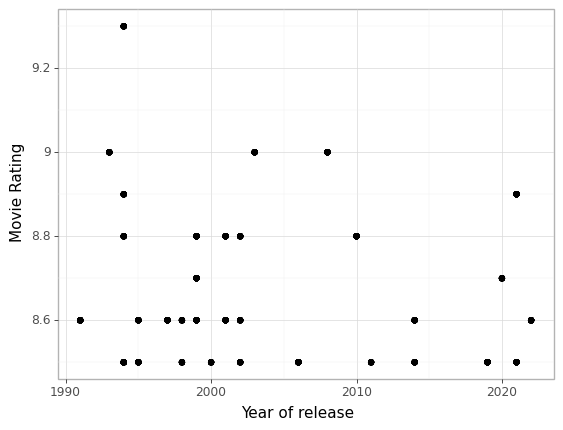

<ggplot: (154918146493)>

In [540]:
(ggplot(df_approved,aes('Year of release','Movie Rating'))
 + geom_point()
 + theme_light()
)

In [541]:
X=df_approved[['Year of release']]
y=df_approved['Movie Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y

0       9.3
2       9.0
3       9.0
4       9.0
7       8.9
       ... 
1044    8.5
1045    8.5
1046    8.5
1047    8.5
1048    8.5
Name: Movie Rating, Length: 798, dtype: float64

In [542]:
X

,Year of release
0,1994.0
2,2008.0
3,2003.0
4,1993.0
7,2021.0
...,...
1044,2000.0
1045,1998.0
1046,1995.0
1047,1994.0


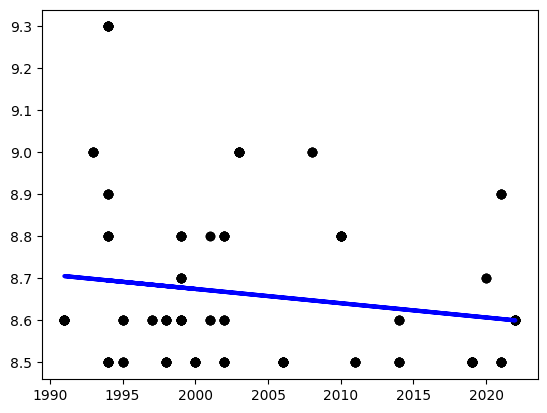

In [543]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

In [544]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.04
Coefficient of determination: 0.06
